In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time
from datetime import datetime
import pickle
import numpy

b2.defaultclock.dt = 0.10 * b2.ms

Load the data 

In [2]:
import pickle
with open('w_pos_1p5_pop_rate_0919_17_50.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)

    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B



In [4]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18
    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()


Get the time that a population rate reaches the threshold level

In [5]:
decision_times = []
rt = []

for i in range(len(data)):
    
    decision_time = get_decision_time(data[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
        

In [6]:
rt

[5727, 6254, 2530, 4022, 2652, 3975, 6860, 0, 2663, 2843]

reaction time 중에 0 이 있으므로 이것을 지워줘야 더 meaningful 한 graph 를 그릴 수 있다. 

In [7]:
rt.remove(0)

In [16]:
rt

[5727, 6254, 2530, 4022, 2652, 3975, 6860, 2663, 2843]

In [18]:
if 0 in rt:
    print('I love you')
else:
    print('I like you')

I like you


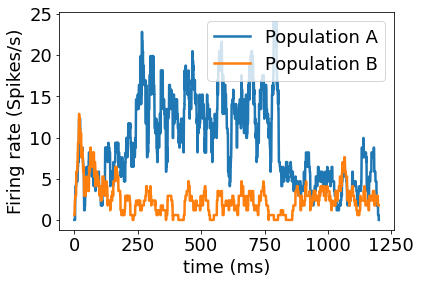

In [8]:
plot_rate(data[7])


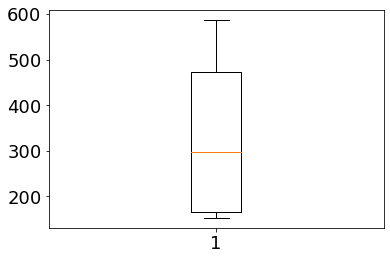

In [9]:
rt_in_realtime = numpy.array(rt) - 1000
rt_in_realtime = rt_in_realtime/10

plt.boxplot(rt_in_realtime)
plt.show()

In [10]:
rt

[5727, 6254, 2530, 4022, 2652, 3975, 6860, 2663, 2843]

In [11]:
for i in range(len(rt)):
    if rt[i] == 0

SyntaxError: expected ':' (681905659.py, line 2)

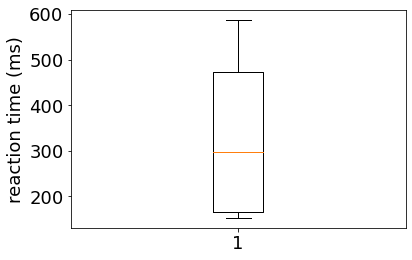

In [12]:
rt_in_realtime = numpy.array(rt) - 1000
rt_in_realtime = rt_in_realtime/10

plt.boxplot(rt_in_realtime)
plt.ylabel('reaction time (ms)')
plt.show()

In [13]:
np_rt = numpy.array(rt_in_realtime)

In [14]:
numpy.median(np_rt)

297.5

In [15]:
np_rt

array([472.7, 525.4, 153. , 302.2, 165.2, 297.5, 586. , 166.3, 184.3])

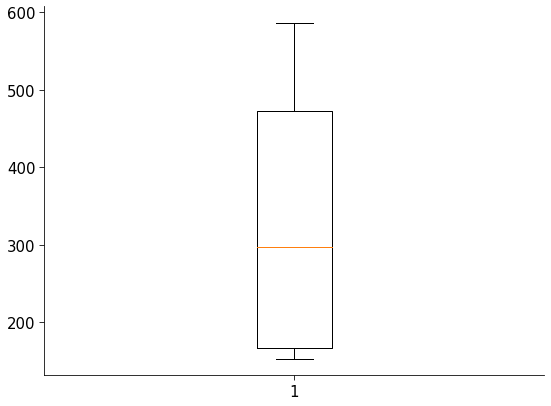

In [33]:
a = plt.boxplot(rt_in_realtime)
